In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/parliament_daily_presence.csv").dropna()

In [3]:
data.columns

Index(['Unnamed: 0', 'date', 'presence', 'ДПС_presence', 'ВОЛЯ_presence',
       'ПГБСП_presence', 'ГЕРБ_presence', 'ОП_presence', 'НЕЗ_presence',
       'next_day_presence', 'Year', 'Month', 'Week', 'Dayofweek',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start'],
      dtype='object')

In [4]:
data.head()

,Unnamed: 0,date,presence,ДПС_presence,ВОЛЯ_presence,ПГБСП_presence,ГЕРБ_presence,ОП_presence,НЕЗ_presence,next_day_presence,Year,Month,Week,Dayofweek,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,0,2019-01-11,0.733333,0.68,0.500000,0.683544,0.778947,0.888889,0.5,0.554167,2019,1,2,4,False,False,False,False,False,False
1,1,2019-01-16,0.554167,0.60,0.500000,0.607595,0.452632,0.740741,0.5,0.620833,2019,1,3,2,False,False,False,False,False,False
2,2,2019-01-17,0.620833,0.64,0.666667,0.556962,0.652632,0.666667,0.5,0.570833,2019,1,3,3,False,False,False,False,False,False
3,3,2019-01-18,0.570833,0.48,0.250000,0.481013,0.705263,0.592593,0.5,0.516667,2019,1,3,4,False,False,False,False,False,False
4,4,2019-01-23,0.516667,0.00,0.333333,0.544304,0.600000,0.703704,0.5,0.520833,2019,1,4,2,False,False,False,False,False,False


In [5]:
numerical_features = ['presence']

# numerical_features = ['presence', 'ДПС_presence', 'ВОЛЯ_presence',
#         'ПГБСП_presence', 'ГЕРБ_presence', 'ОП_presence', 'НЕЗ_presence']
#categorical_features =[] 
categorical_features = ['Year', 'Month', 'Dayofweek']

features_df = data[numerical_features].copy()

for cat_feat in categorical_features:
    dummies = pd.get_dummies(data[cat_feat], prefix=cat_feat)
    dummies = dummies.drop(columns=dummies.columns[:1])
    features_df = pd.concat([features_df, dummies],axis=1)

    
features_df['bias'] = 1
features_df.head()


,presence,Year_2020,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_9,Month_10,Month_11,Month_12,Dayofweek_1,Dayofweek_2,Dayofweek_3,Dayofweek_4,bias
0,0.733333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0.554167,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.620833,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0.570833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.516667,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [6]:
from statsmodels.api import OLS

In [7]:
model = OLS(data['next_day_presence'].values, features_df, hasconst=True)

In [8]:
results = model.fit()

In [9]:
from interpretable_models import weight_plot

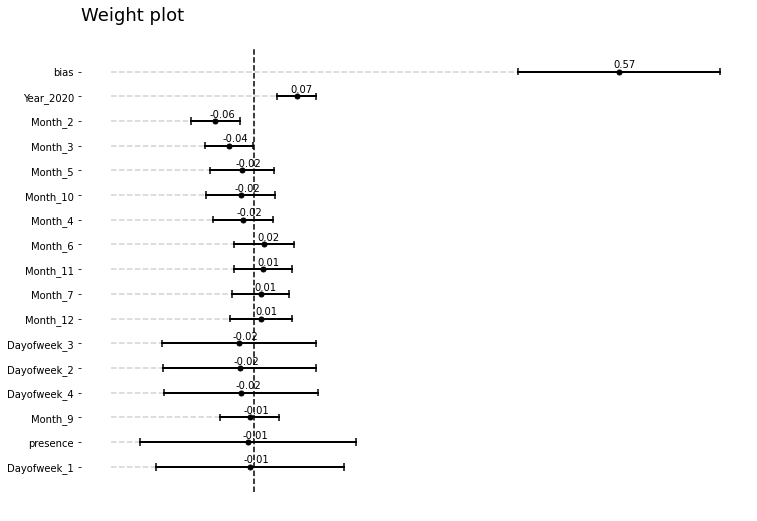

In [10]:
%matplotlib inline
weight_plot(results)


In [11]:
results.summary2().tables[1].sort_values('t', ascending=False)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
bias,0.572995,0.079941,7.167697,4.737117e-11,0.414874,0.731115
Year_2020,0.067169,0.015657,4.290037,3.411566e-05,0.036200,0.098138
Month_6,0.015734,0.023583,0.667189,5.058072e-01,-0.030911,0.062379
Month_11,0.014354,0.022779,0.630138,5.296855e-01,-0.030701,0.059409
Month_7,0.010650,0.022569,0.471873,6.377906e-01,-0.033991,0.055290
Month_12,0.011587,0.024608,0.470851,6.385183e-01,-0.037087,0.060261
Dayofweek_1,-0.006213,0.074416,-0.083493,9.335848e-01,-0.153404,0.140978
presence,-0.008739,0.085497,-0.102214,9.187411e-01,-0.177848,0.160370
Month_9,-0.006528,0.023611,-0.276484,7.826054e-01,-0.053229,0.040173
Dayofweek_4,-0.019719,0.060830,-0.324167,7.463207e-01,-0.140038,0.100600


In [80]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


In [70]:
tree = DecisionTreeRegressor()

In [72]:
model =  tree.fit(features_df, data['next_day_presence'])

[Text(133.02105231436838, 211.04470588235293, 'X[0] <= 0.466\nmse = 0.004\nsamples = 150\nvalue = 0.545'),
 Text(87.39264705882354, 198.25411764705882, 'X[14] <= 0.5\nmse = 0.069\nsamples = 3\nvalue = 0.368'),
 Text(84.80981195756992, 185.4635294117647, 'X[9] <= 0.5\nmse = 0.002\nsamples = 2\nvalue = 0.552'),
 Text(82.2269768563163, 172.6729411764706, 'mse = 0.0\nsamples = 1\nvalue = 0.512'),
 Text(87.39264705882354, 172.6729411764706, 'mse = 0.0\nsamples = 1\nvalue = 0.592'),
 Text(89.97548216007715, 185.4635294117647, 'mse = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(178.6494575699132, 198.25411764705882, 'X[0] <= 0.52\nmse = 0.002\nsamples = 147\nvalue = 0.549'),
 Text(95.14115236258438, 185.4635294117647, 'X[7] <= 0.5\nmse = 0.001\nsamples = 41\nvalue = 0.524'),
 Text(92.55831726133077, 172.6729411764706, 'X[1] <= 0.5\nmse = 0.001\nsamples = 40\nvalue = 0.522'),
 Text(81.80323047251689, 159.88235294117646, 'X[11] <= 0.5\nmse = 0.001\nsamples = 37\nvalue = 0.518'),
 Text(79.220395371263

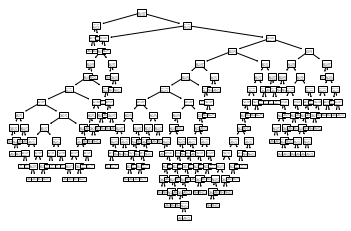

In [82]:
%matplotlib inline
plot_tree(model)